### Auto-encoder 실행해 보기

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# autoencoder 결과물 플롯 함수
def plot_autoencoder_outputs(autoencoder, x, n, dims):
    """
    
    :param autoencoder: 학습된 autoencoder 모델  
    :param x: image를 그려볼 데이터
    :param n: 몇 개의 image를 그릴것인지 n을 통해 전달 
    :param dims: 이미지 plot을 위해 1차원 배열을 2차원으로 바꿔주어야 함 
    :return: 
    """
    decoded_imgs = autoencoder.predict(x)

    plt.figure(figsize=(10, 5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # ax.set_title('Original Images')
        if i == n // 2:
            ax.set_title('Original Images')

        # plot reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # ax.set_title('Reconstructed Images')
        if i == n // 2:
            ax.set_title('Reconstructed Images')

    plt.show()

In [10]:
# 내장 데이터셋 호출을 위한 함수 호출
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 차원 확인
print(X_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000, )
print(X_test.shape) # (10000, 28, 28)
print(y_test.shape) # (10000, )

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


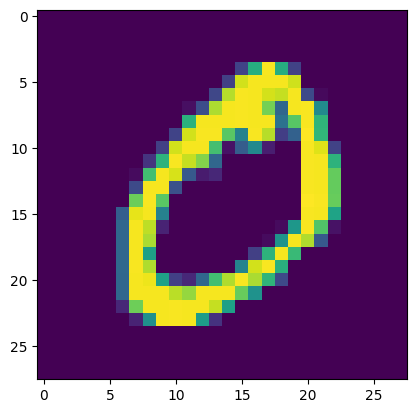

In [11]:
plt.imshow(X_train[1])

In [12]:
# 데이터 형태 및 유형 변경
X_train = X_train.reshape(-1, 28 * 28).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28 * 28).astype(np.float32) / 255.0

In [13]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# dimension 설정
input_dim = X_train.shape[-1]
hidden_dim = 128
code_dim = 32

# 함수형 API 활용
input_img = Input(shape=(input_dim, ))
hidden_1 = Dense(hidden_dim, activation='relu')(input_img)
code = Dense(code_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_dim, activation='relu')(code)
output_img = Dense(input_dim, activation='sigmoid')(hidden_2)

# input과 output을 모델로 전달
autoencoder = Model(inputs=input_img, outputs=output_img)


# 모델 compile 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 모델 학습 진행
autoencoder.fit(X_train, X_train, epochs=5)


Epoch 1/5

1875/1875 [==============================] - 16s 7ms/step - loss: 0.1369
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0986
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0926
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0897
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0878


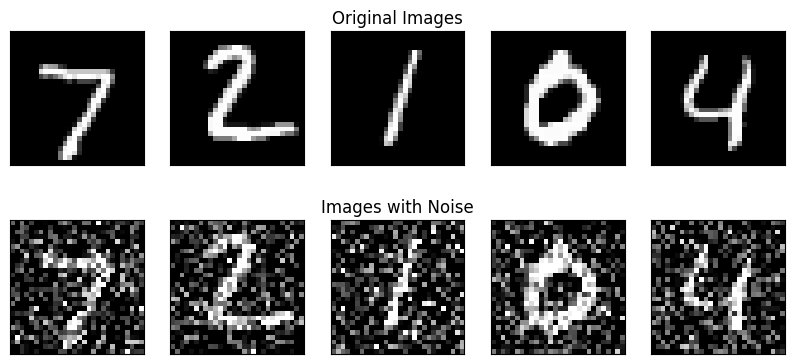

In [14]:
# 원본 데이터에 노이즈 추가
noise_factor = 0.4
X_train_w_noise = X_train + noise_factor * np.random.normal(size=X_train.shape)
X_test_w_noise = X_test + noise_factor * np.random.normal(size=X_test.shape)

# clip 함수를 통해 min, max 값을 넘어서는 값은 min과 max로 치환
X_train_w_noise = np.clip(X_train_w_noise, 0.0, 1.0)
X_test_w_noise = np.clip(X_test_w_noise, 0.0, 1.0)


# 노이즈 인풋과 원본 인풋 확인
n = 5

plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # plot image with noise
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_w_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Images with Noise')

In [15]:
# 사실상 모델 구조는 일반 오토인코더와 동일합니다.

input_img = Input(shape=(input_dim, ))
hidden_1 = Dense(hidden_dim, activation='relu')(input_img)
code = Dense(code_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_dim, activation='relu')(code)
output_img = Dense(input_dim, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=input_img, outputs=output_img)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train_w_noise, X_train, epochs=5)  # 입력은 노이즈, 출력은 원본

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1651
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1286
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1225
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1192
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1172


313/313 [==============================] - 3s 5ms/step


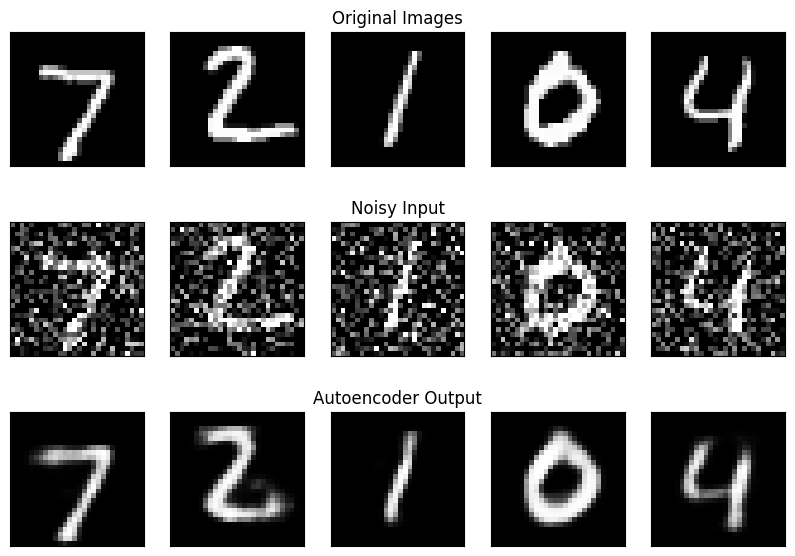

In [16]:
n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(X_test_w_noise)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # plot noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_w_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Noisy Input')

    # plot noisy image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Autoencoder Output')

### Auto-encoder 기반 이미지 노이즈 제거 알고리즘 구현

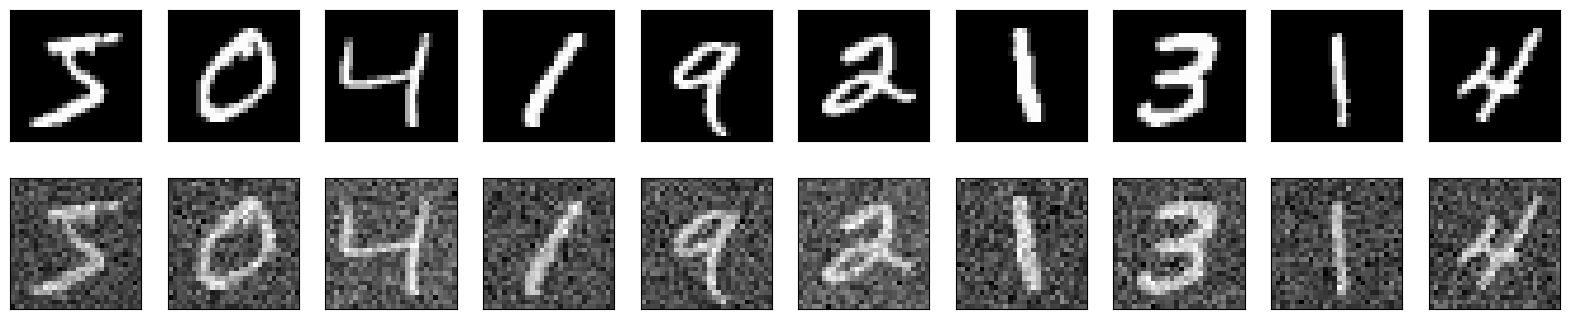

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 175.7834 - val_loss: 227.7096
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: -2740.7981 - val_loss: 744.7999
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: -34564.4531 - val_loss: 6504.1943
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: -174473.3281 - val_loss: 16208.5713
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: -233727.5781 - val_loss: 60575.7539
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: -1352278.5000 - val_loss: 137545.0156
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: -2882730.5000 - val_loss: 199666.9688
Epoch 8/20
469/469 [==============================] - 9s 19ms/step - loss: -5506663.5000 - val_loss: 216887.2969
Epoch 9/20
469/469 [==============================] - 8s 17ms/step - loss: 1053038400.0000 - val_loss: 695193.0000
Epo

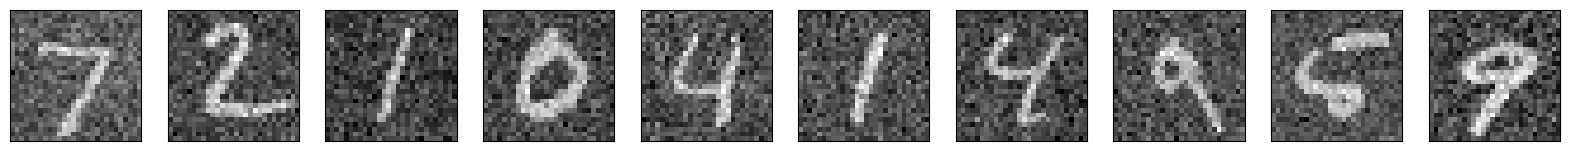

313/313 [==============================] - 1s 3ms/step


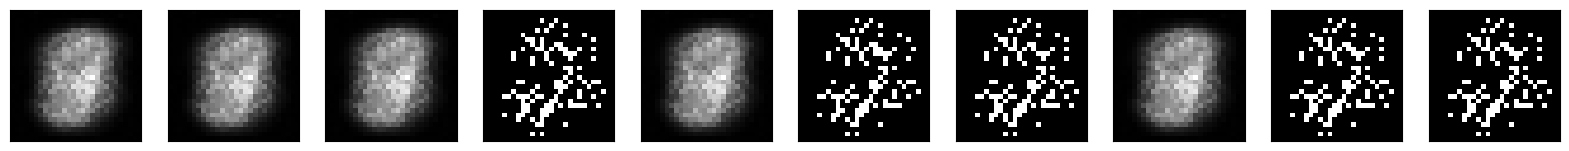

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

# MNIST 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 데이터 전처리
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# VAE 모델 정의
original_dim = 784
latent_dim = 2

inputs = Input(shape=(original_dim,))
h = Dense(512, activation='relu')(inputs)  # 조절
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# 샘플링 함수 정의
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# 잠재 변수 샘플링
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# 디코더
decoder_h = Dense(256, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# 전체 VAE 모델
vae = Model(inputs, x_decoded_mean)

# 손실 함수 정의
xent_loss = original_dim * K.mean(K.binary_crossentropy(inputs, x_decoded_mean))
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

# VAE 모델 컴파일
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')

# 훈련 데이터에 노이즈 추가
noise_factor = 0.2 
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)


# 노이즈가 있는 이미지와 원본 이미지 시각화
n = 10  # 시각화할 이미지 개수
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈가 있는 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# VAE 모델 훈련
vae.fit(x_train_noisy, epochs=20, batch_size=128, validation_data=(x_test, None))

# 테스트 데이터에 노이즈 추가
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


# 노이즈가 있는 테스트 이미지 시각화
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 노이즈 제거된 이미지 생성
x_test_decoded = vae.predict(x_test_noisy)

# 노이즈 제거된 이미지 시각화
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
